In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from wordcloud import WordCloud, STOPWORDS 
import textwrap
import string
import warnings
warnings.simplefilter('ignore')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
imdb_movies = pd.read_csv('C:/Users/hp15s/Desktop/movierec/data/movies.csv')

imdb_movies.head()

,,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,439,tt0016240,Prem Sanyas,Prem Sanyas,1925,1926-02-04,Drama,97,"India, Germany",NaN,...,"Seeta Devi, Himanshu Rai, Sarada Ukil, Ranibal...",This adaptation of Arnold's 1861 Orientalist e...,6.8,134,NaN,NaN,NaN,NaN,3.0,1.0
1,672,tt0019374,Shiraz,Shiraz,1928,1929-10-21,"Drama, History, Romance",97,"India, UK, Germany",NaN,...,"Himanshu Rai, Charu Roy, Seeta Devi, Enakashi ...",A historical romance set in the Mughal Empire....,7.0,229,NaN,NaN,16467.0,NaN,4.0,9.0
2,787,tt0020286,Prapancha Pash,Prapancha Pash,1929,2008,"Adventure, Drama, Romance",74,"UK, India, Germany",English,...,"Seeta Devi, Himanshu Rai, Charu Roy, Modhu Bos...",Two neighboring Indian kingdoms are ruled by c...,6.5,710,NaN,NaN,2306.0,NaN,8.0,14.0
3,1016,tt0021594,Alam Ara,Alam Ara,1931,1931-03-14,"Drama, Fantasy",124,India,"Hindi, Urdu",...,"Master Vithal, Zubeida, Jillo, Sushila, Prithv...",A period fantasy that told of the ageing king ...,6.3,106,NaN,NaN,NaN,NaN,NaN,1.0
4,2308,tt0027256,Achhut Kanya,Achhut Kanya,1936,1936,"Drama, Musical, Romance",142,India,"Hindi, Urdu",...,"Devika Rani, Ashok Kumar, Monorama, Pramila, K...","An ""untouchable"" girl and a Brahmin boy fall i...",6.5,104,NaN,NaN,NaN,NaN,2.0,1.0


In [10]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6373 entries, 0 to 6372
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0                           6373 non-null   int64  
 1   imdb_title_id           6373 non-null   object 
 2   title                   6373 non-null   object 
 3   original_title          6373 non-null   object 
 4   year                    6373 non-null   int64  
 5   date_published          6373 non-null   object 
 6   genre                   6373 non-null   object 
 7   duration                6373 non-null   int64  
 8   country                 6373 non-null   object 
 9   language                6342 non-null   object 
 10  director                6360 non-null   object 
 11  writer                  5740 non-null   object 
 12  production_company      5639 non-null   object 
 13  actors                  6373 non-null   object 
 14  description             6292 non-null   

In [4]:
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = imdb_movies['production_company'].value_counts()[:10]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count')
plt.ylabel('Production Company name')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x1000 with 0 Axes>

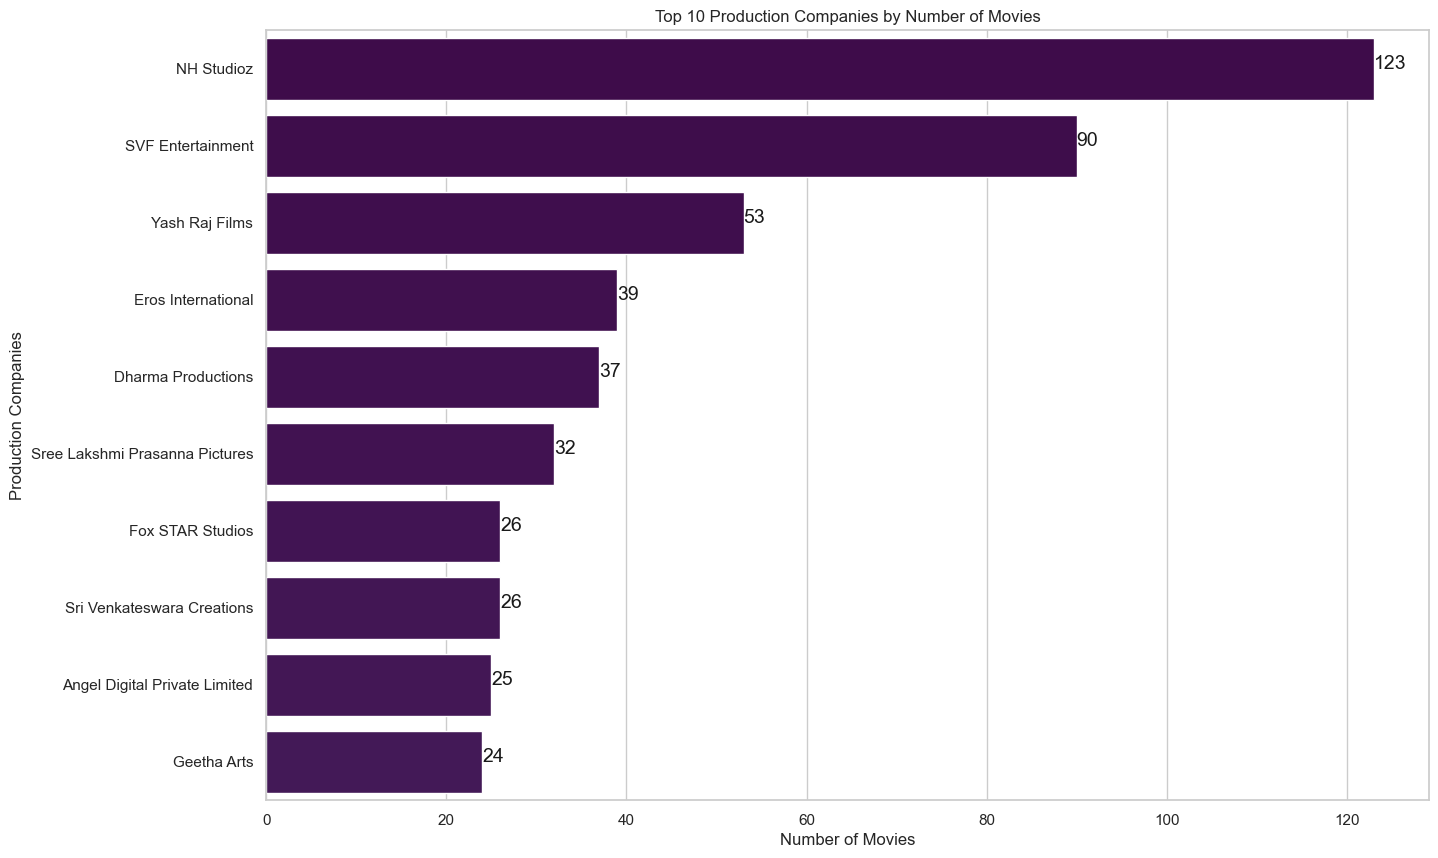

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you've already read the data
# imdb_movies = pd.read_csv('C:/Users/hp15s/Desktop/movierec/data/movies.csv')

plt.figure(figsize=(15, 10))
count = imdb_movies['production_company'].value_counts()[:10]

# Create a colormap
cmap = cm.get_cmap('viridis')  # You can choose any colormap you prefer

# Create a bar plot with the colormap
sns.barplot(x=count.values, y=count.index, palette=[cmap(i) for i in range(10)])

for i, v in enumerate(count.values):
    plt.text(v, i, str(v), color='k', fontsize=14)

plt.xlabel('Number of Movies')
plt.ylabel('Production Companies')
plt.title('Top 10 Production Companies by Number of Movies')
plt.show()



In [6]:
a = plt.cm.autumn

plt.figure(figsize=(15,10))
count = imdb_movies['genre'].value_counts()[:10]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Distribution of Genres")

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x1000 with 0 Axes>

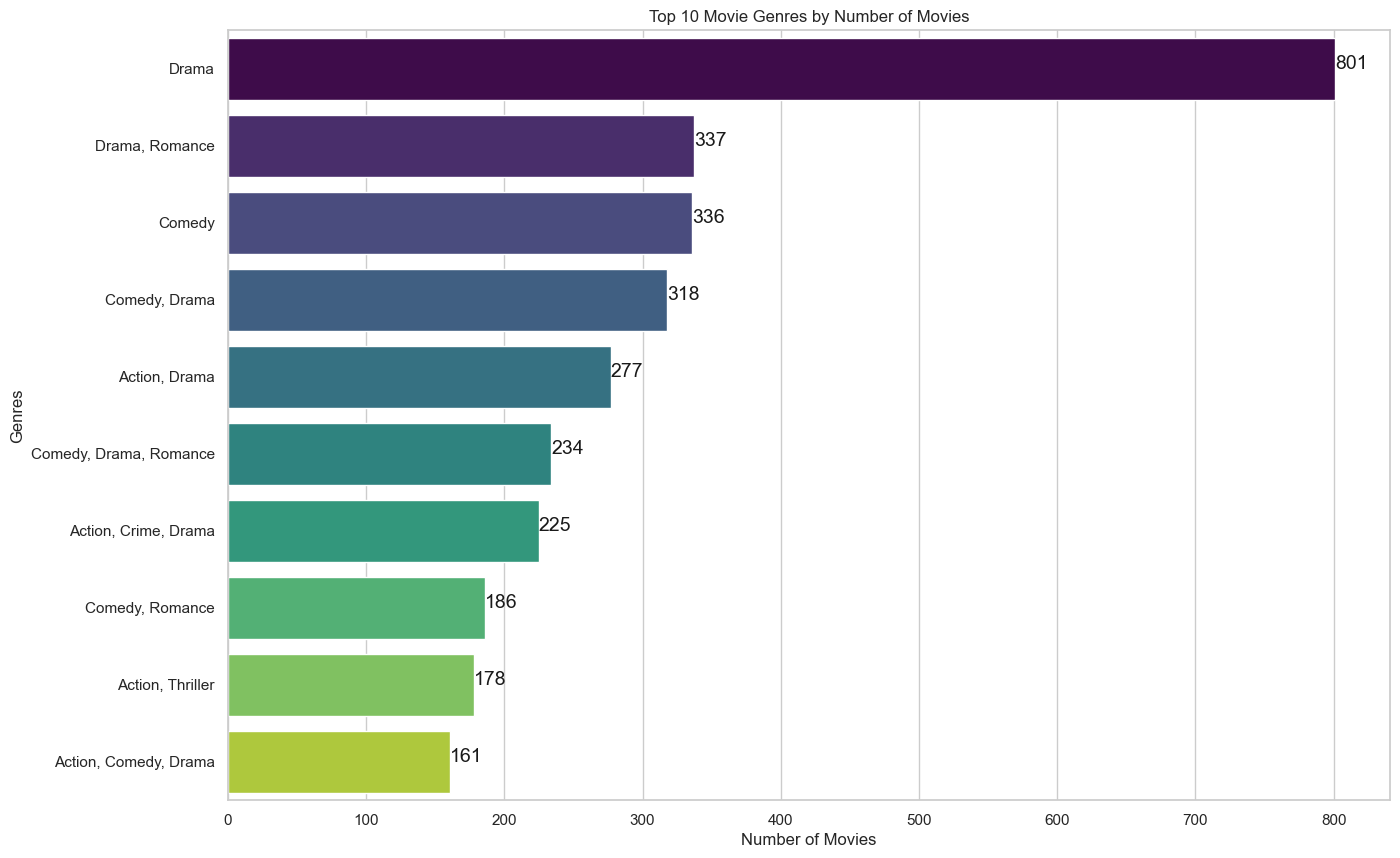

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you've already read the data
# imdb_movies = pd.read_csv('C:/Users/hp15s/Desktop/movierec/data/movies.csv')

plt.figure(figsize=(15, 10))
count = imdb_movies['genre'].value_counts()[:10]

# Create a colormap
cmap = cm.get_cmap('viridis')  # You can choose any other colormap like 'plasma', 'cividis', etc.

# Create a color palette from the colormap
palette = [cmap(i / 10) for i in range(10)]

# Create the bar plot
sns.barplot(x=count.values, y=count.index, palette=palette)

# Annotate the bars with values
for i, v in enumerate(count.values):
    plt.text(v, i, str(v), color='k', fontsize=14)

plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Top 10 Movie Genres by Number of Movies')
plt.show()


In [16]:
num_data = ['duration', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worldwide_gross_income', 
            'metascore', 'reviews_from_users', 'reviews_from_critics']
imdb_movies[num_data].describe()

,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6373.000000,6373.000000,6373.000000,1.158000e+03,6.180000e+02,1.993000e+03,144.000000,5676.000000,4272.000000
mean,138.243214,6.216131,3449.462420,1.322012e+08,5.200459e+06,1.546427e+07,54.534722,31.713707,10.147004
std,23.074516,1.423553,18859.366095,3.200706e+08,2.448189e+07,7.537878e+07,16.052324,168.217414,32.058560
min,45.000000,1.000000,100.000000,0.000000e+00,1.416000e+03,4.200000e+01,17.000000,1.000000,1.000000
25%,123.000000,5.300000,213.000000,9.000000e+06,1.341840e+05,4.220400e+04,42.750000,3.000000,1.000000
50%,140.000000,6.500000,503.000000,4.000000e+07,4.845540e+05,2.432460e+05,55.000000,6.000000,3.000000
75%,153.000000,7.200000,1582.000000,1.395000e+08,1.431122e+06,1.574703e+06,66.000000,18.000000,9.000000
max,321.000000,9.900000,786365.000000,5.420000e+09,4.045402e+08,1.300000e+09,89.000000,7639.000000,582.000000


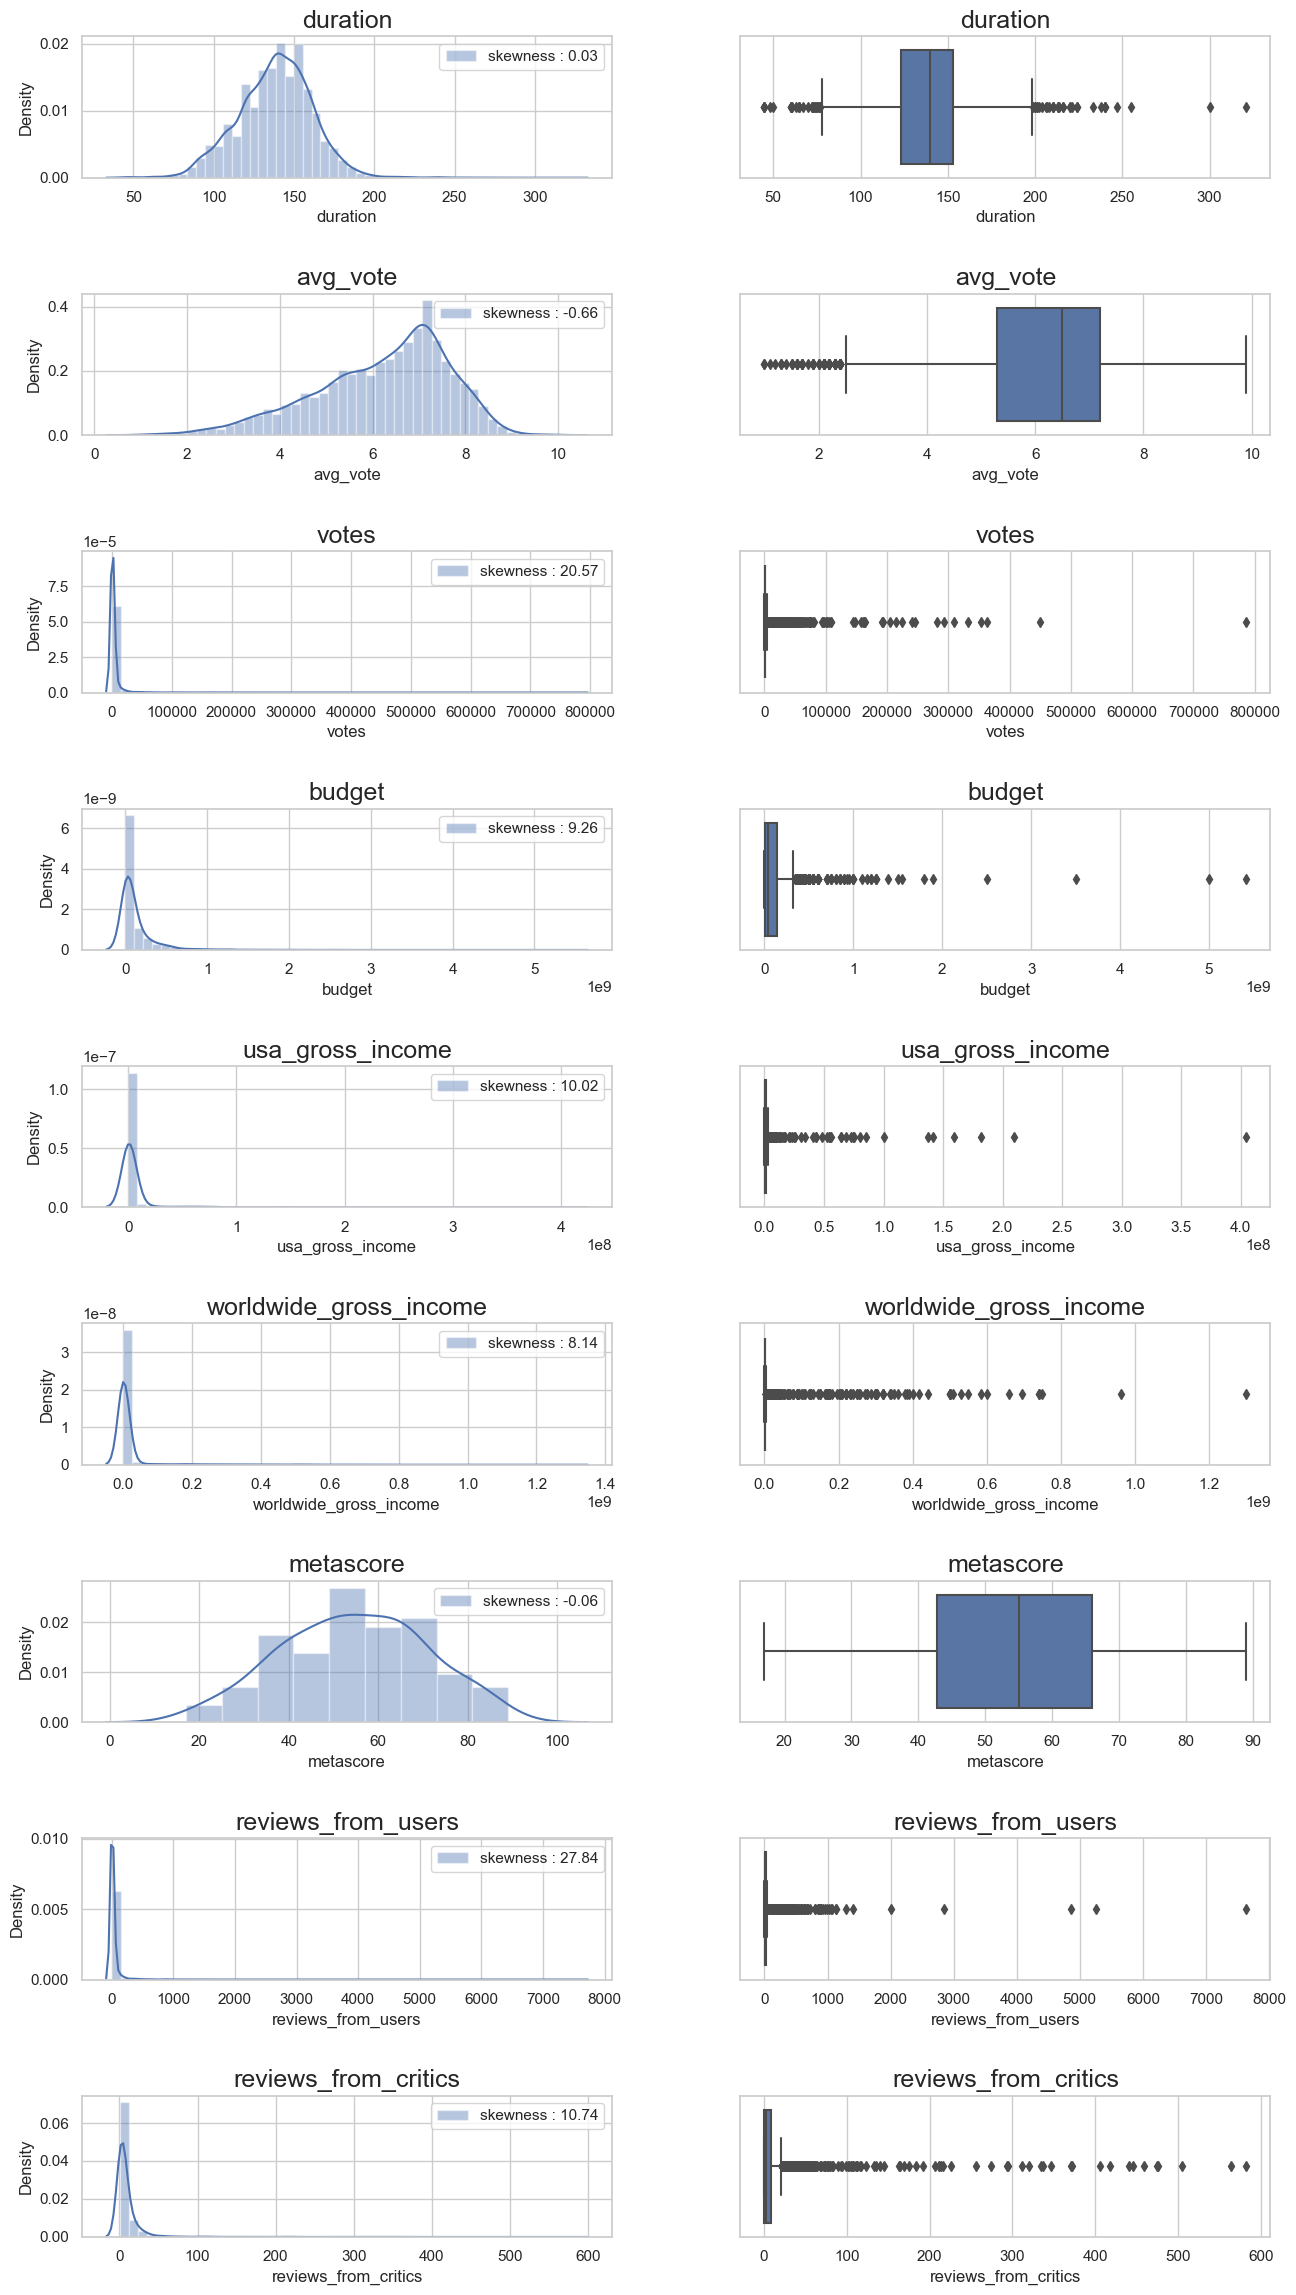

In [17]:
fig, ax = plt.subplots(9, 2, figsize = (14, 24))
fig.tight_layout(pad = 5)

for i, n in enumerate(num_data):
    sns.distplot(ax = ax[i,0], a = imdb_movies[n].dropna(), label = 'skewness : %.2f'%(imdb_movies[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = imdb_movies[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

In [18]:
imdb_movies['year'].replace('TV Movie 2019', 2019, inplace = True)
imdb_movies['year'] = imdb_movies['year'].astype(int)

# Group the data based on Decades
movies_by_decades = imdb_movies[['imdb_title_id', 'original_title', 'year','avg_vote', 'votes']]
decades = movies_by_decades['year']//10*10
decades = decades.astype(str)+' - '+ (decades+9).astype(str)
decades_column = pd.DataFrame(decades)
movies_by_decades.insert(3, 'decades', decades_column)
movies_by_decades.head()

,imdb_title_id,original_title,year,decades,avg_vote,votes
0,tt0016240,Prem Sanyas,1925,1920 - 1929,6.8,134
1,tt0019374,Shiraz,1928,1920 - 1929,7.0,229
2,tt0020286,Prapancha Pash,1929,1920 - 1929,6.5,710
3,tt0021594,Alam Ara,1931,1930 - 1939,6.3,106
4,tt0027256,Achhut Kanya,1936,1930 - 1939,6.5,104


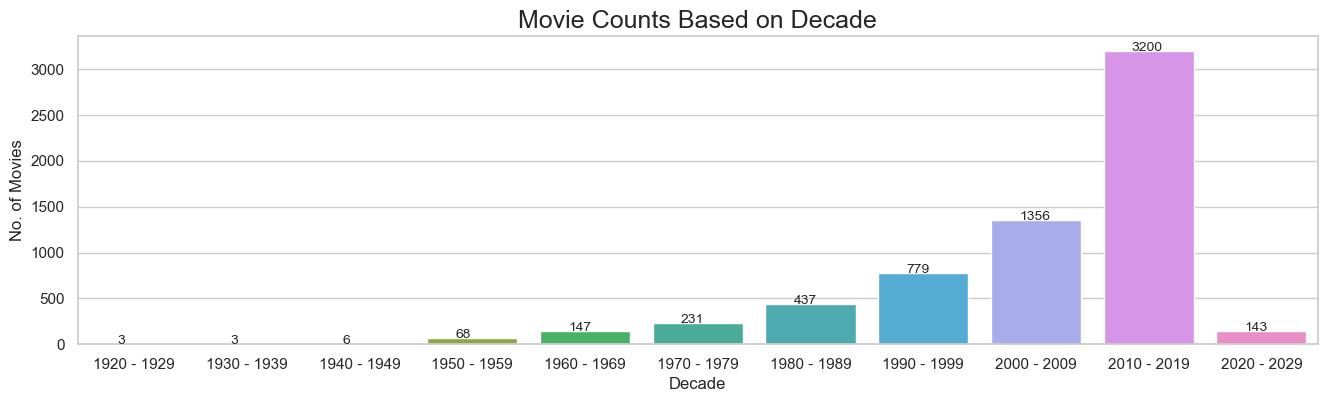

In [19]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['imdb_title_id'].count().index
count = movies_by_decades.groupby('decades')['imdb_title_id'].count()
sns.barplot(ax = ax, x = decades, y = count)
ax.set_title('Movie Counts Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,count in enumerate(count.astype(int)):
       ax.text(x=index-0.15 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
plt.show()

In [20]:
imdb_movies['date_published'].replace('TV Movie 2019', 2019, inplace = True)
movies_published = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'date_published','votes']]
movies_published['month_published'] = [month[5:7] for month in movies_published['date_published'].astype(str)]

#print(movies_published['month_published'].unique()) # There are blank values on month_published column
movies_published['month_published'][movies_published['month_published']==''] = np.nan # replace blank values with nan
movies_published.head()

,imdb_title_id,original_title,genre,date_published,votes,month_published
0,tt0016240,Prem Sanyas,Drama,1926-02-04,134,02
1,tt0019374,Shiraz,"Drama, History, Romance",1929-10-21,229,10
2,tt0020286,Prapancha Pash,"Adventure, Drama, Romance",2008,710,NaN
3,tt0021594,Alam Ara,"Drama, Fantasy",1931-03-14,106,03
4,tt0027256,Achhut Kanya,"Drama, Musical, Romance",1936,104,NaN


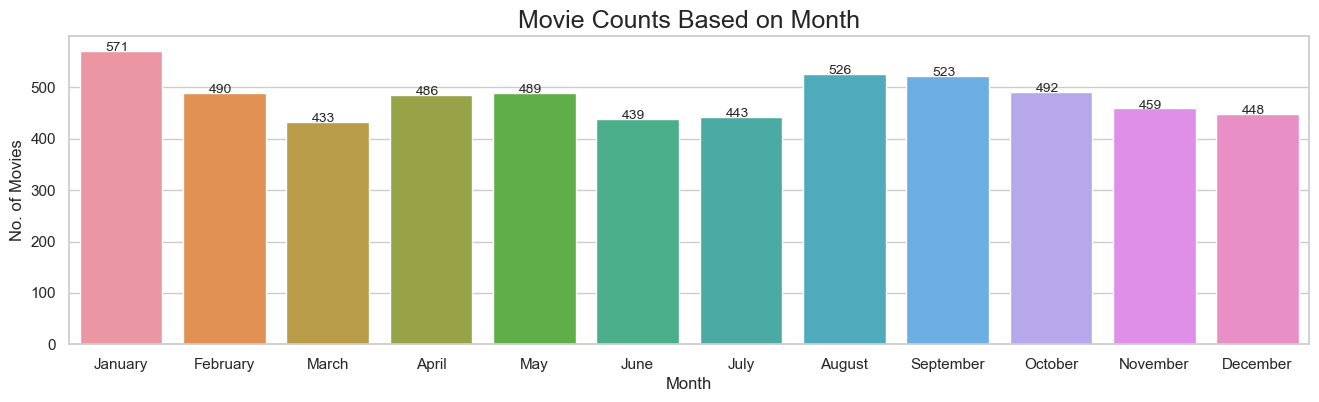

In [21]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
months_published = movies_published.groupby('month_published')['imdb_title_id'].count().index
count_movies = movies_published.groupby('month_published')['imdb_title_id'].count()
sns.barplot(ax = ax, x = months_published, y = count_movies)
ax.set_title('Movie Counts Based on Month', fontsize = 18)
ax.set_xlabel('Month')
ax.set_ylabel('No. of Movies')
for index,count_movies in enumerate(count_movies):
       ax.text(x=index-0.15 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June'
                    , 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

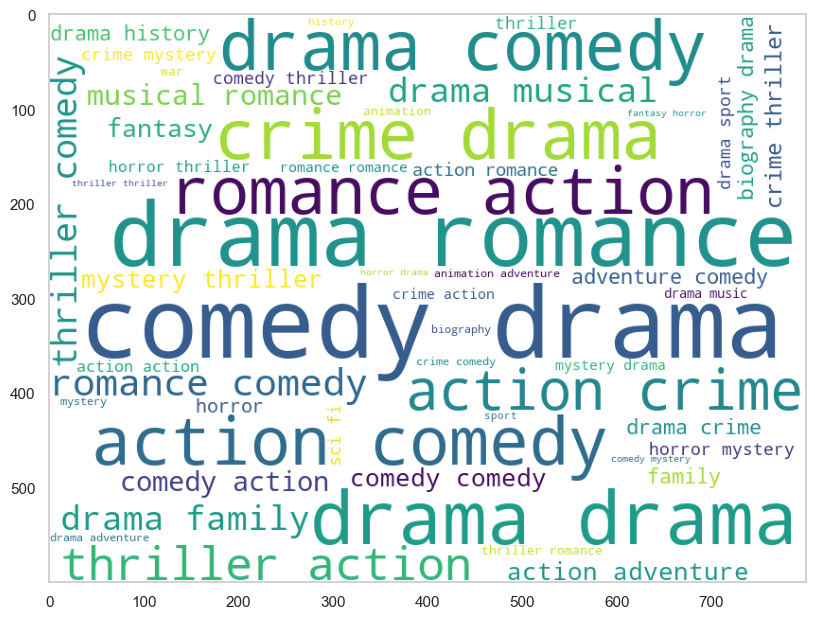

In [22]:
comment_words = ''
stop_words = set(STOPWORDS)

for val in imdb_movies['genre']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600, background_color = 'white'
                      , stopwords = stop_words, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (8, 6))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show()

In [23]:
movies_genre = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'avg_vote']]
movies_genre['genre'] = movies_genre['genre'].astype('str')

genre_split = pd.DataFrame(movies_genre['genre'].str.split(',').tolist(), index=movies_genre['imdb_title_id']).stack()
genre_split = genre_split.reset_index(['imdb_title_id'])
genre_split.columns = ['imdb_title_id', 'genre_split']
movies_genre_split = pd.merge(genre_split, movies_genre[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_genre_split['genre_split'] = movies_genre_split['genre_split'].str.lstrip(' ').str.rstrip(' ')
movies_genre_split.tail()

,imdb_title_id,genre_split,original_title,avg_vote
13592,tt9905412,Drama,Ottam,7.4
13593,tt9905462,Drama,Pengalila,8.8
13594,tt9906644,Comedy,Manoharam,6.8
13595,tt9906644,Drama,Manoharam,6.8
13596,tt9911774,Drama,Padmavyuhathile Abhimanyu,7.9


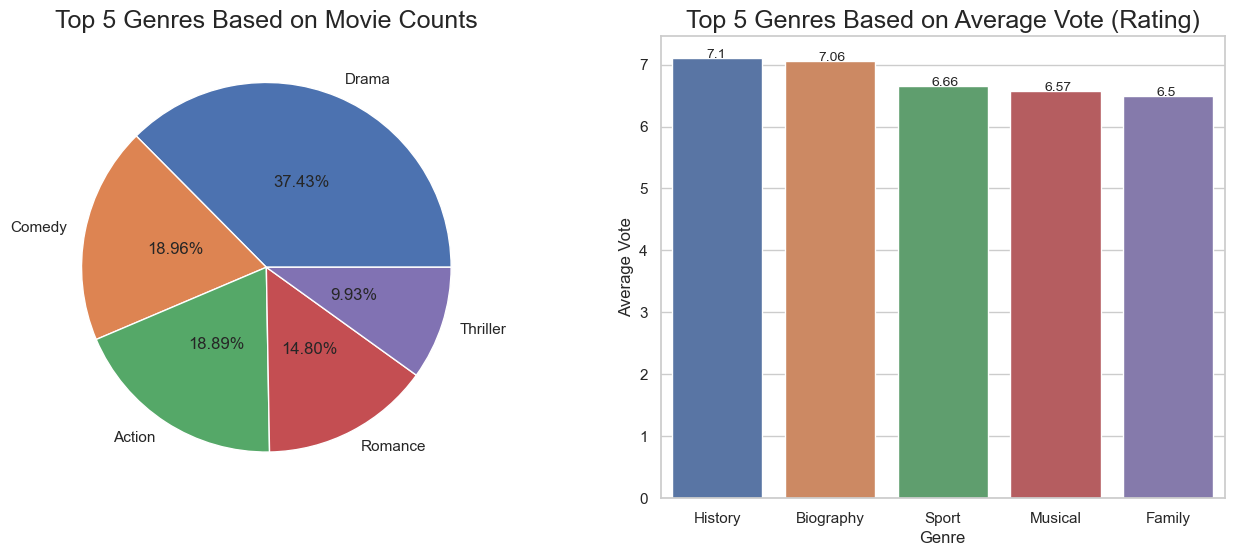

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))

genres = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False).index[0:5]
count_movies = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False)[0:5]
ax[0].pie(x=count_movies, autopct="%.2f%%", labels=genres, pctdistance=0.5)
ax[0].set_title('Top 5 Genres Based on Movie Counts', fontsize = 18)

genres = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False).index[0:5]
avg_votes = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False)[0:5]
sns.barplot(ax = ax[1], x = genres, y = avg_votes)
ax[1].set_title('Top 5 Genres Based on Average Vote (Rating)', fontsize = 18)
ax[1].set_xlabel('Genre')
for index,avg_votes in enumerate(round(avg_votes, 2)):
    ax[1].text(x=index-0.1 , y =avg_votes+0 , s=f"{avg_votes}" , fontdict=dict(fontsize=10))
ax[1].set_ylabel('Average Vote')


plt.show()

In [25]:
movies_director = imdb_movies[['imdb_title_id', 'original_title', 'director', 'avg_vote']]
movies_director['director'] = movies_director['director'].astype('str')

director_split = pd.DataFrame(movies_director['director'].str.split(',').tolist(), index=movies_director['imdb_title_id']).stack()
director_split = director_split.reset_index(['imdb_title_id'])
director_split.columns = ['imdb_title_id', 'director_split']
movies_director_split = pd.merge(director_split, movies_director[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_director_split['director_split'] = movies_director_split['director_split'].str.lstrip(' ').str.rstrip(' ')
gb_director = movies_director_split.groupby('director_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_director.drop(gb_director[gb_director.index == 'nan'].index, inplace = True)
gb_director.head()

,imdb_title_id,avg_vote
,count,mean
director_split,,
A. Balakrishnan,1,7.000000
A. Bhimsingh,8,6.925000
A. Jagadesh,1,3.600000
A. Karunakaran,9,6.577778
A. Mahadev,1,5.500000


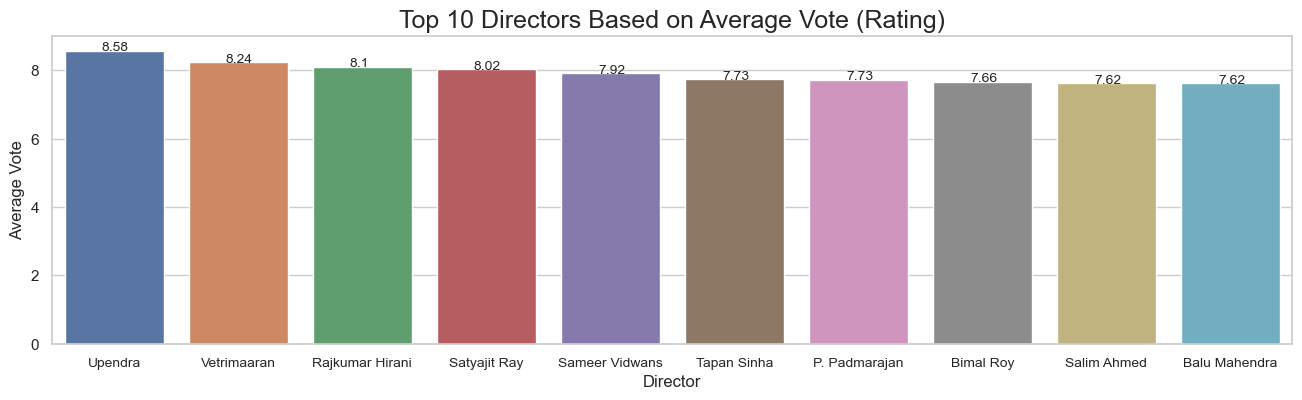

In [26]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have direct 5 movies
mask = movies_director_split.groupby('director_split')['imdb_title_id'].count() >= 5
directors = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = directors, y = avg_vote)
ax.set_title('Top 10 Directors Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Director')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')

plt.show()

In [27]:
movies_writer = imdb_movies[['imdb_title_id', 'original_title', 'writer', 'avg_vote']]
movies_writer['writer'] = movies_writer['writer'].astype('str')

writer_split = pd.DataFrame(movies_writer['writer'].str.split(',').tolist(), index=movies_writer['imdb_title_id']).stack()
writer_split = writer_split.reset_index(['imdb_title_id'])
writer_split.columns = ['imdb_title_id', 'writer_split']
movies_writer_split = pd.merge(writer_split, movies_writer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_writer_split['writer_split'] = movies_writer_split['writer_split'].str.lstrip(' ').str.rstrip(' ')
gb_writer = movies_writer_split.groupby('writer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_writer.drop(gb_writer[gb_writer.index == 'nan'].index, inplace = True)
gb_writer.head()

,imdb_title_id,avg_vote
,count,mean
writer_split,,
A. Bhimsingh,4,6.975000
A. Deepakraj,3,5.766667
A. Jagadesh,1,3.600000
A. Karunakaran,9,6.322222
A. Mahadev,1,5.500000


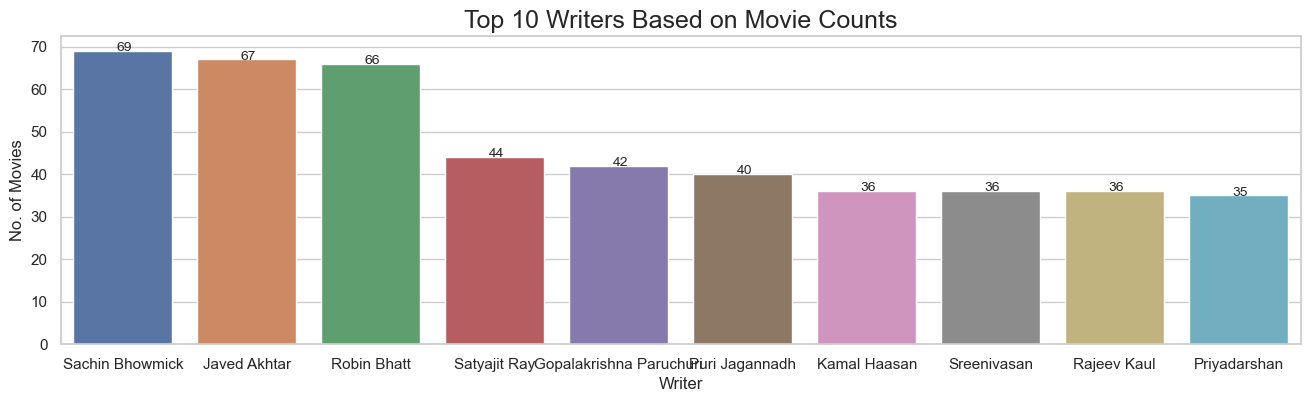

In [28]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

writers = gb_writer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_writer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = writers, y = count_movies)
ax.set_title('Top 10 Writers Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Writer')
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')

plt.show()

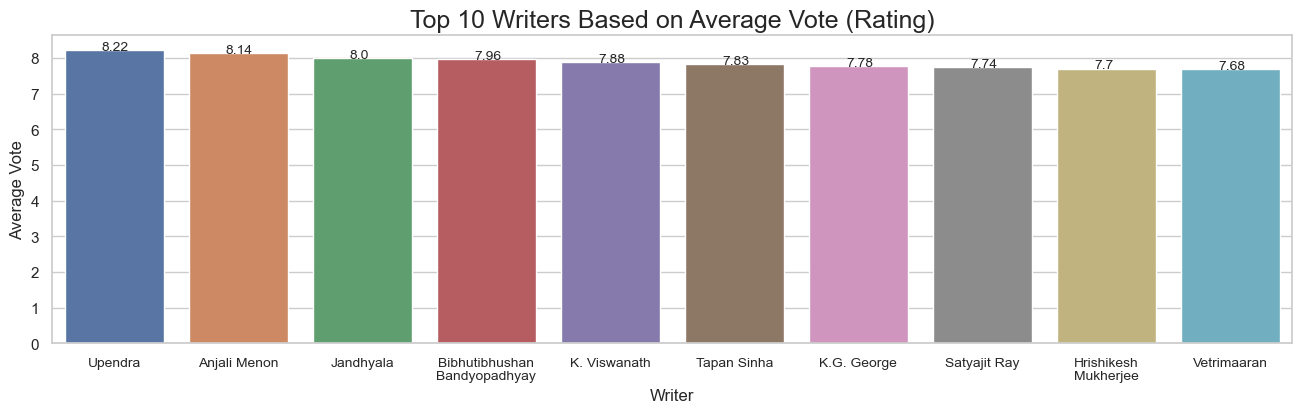

In [29]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have write 5 movies
mask = movies_writer_split.groupby('writer_split')['imdb_title_id'].count() >= 5
writers = gb_writer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_writer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = writers, y = avg_vote)
ax.set_title('Top 10 Writers Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Writer')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')

plt.show()

In [30]:
movies_productioncomp = imdb_movies[['imdb_title_id', 'original_title', 'production_company', 'avg_vote']]
movies_productioncomp['production_company'] = movies_productioncomp['production_company'].astype('str')

gb_productioncomp = movies_productioncomp.groupby('production_company').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_productioncomp.drop((gb_productioncomp[gb_productioncomp.index == ''].index) | (gb_productioncomp[gb_productioncomp.index == 'nan'].index), inplace = True)
gb_productioncomp.head()

,imdb_title_id,avg_vote
,count,mean
production_company,,
1-800-Love,1,6.2
1000 Lights Entertainments,1,6.1
100th Monkey Movies,1,7.3
11:11 Production,1,3.6
1234 Cine Creations,1,9.2


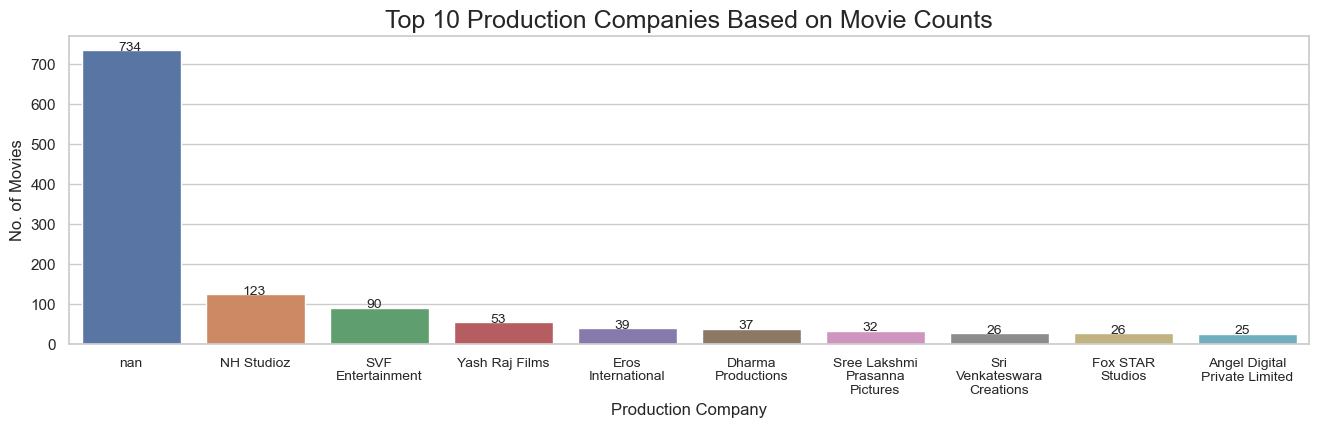

In [31]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

productioncomp = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = count_movies)
ax.set_title('Top 10 Production Companies Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0.6 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
plt.show()

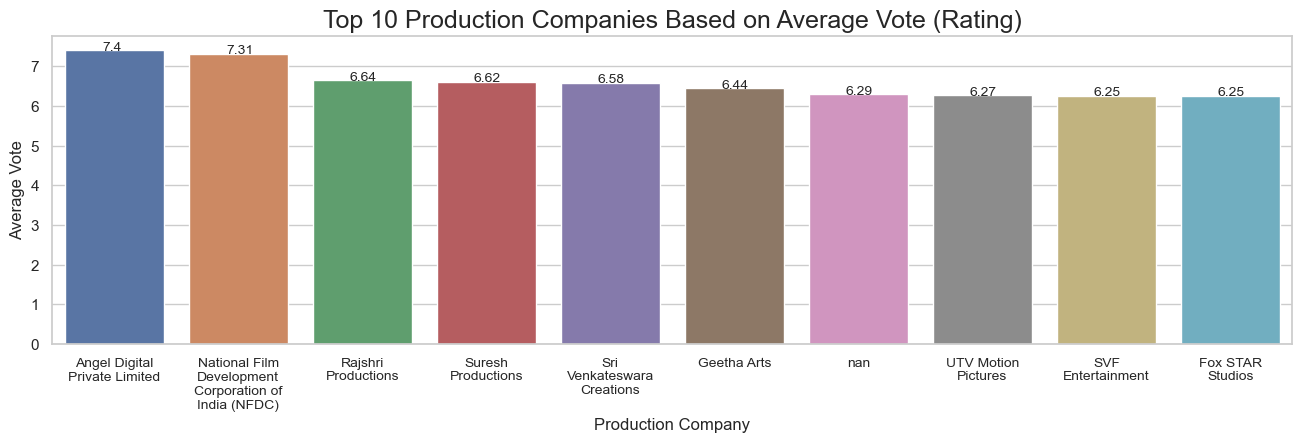

In [32]:
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have produce 20 movies
mask = movies_productioncomp.groupby('production_company')['imdb_title_id'].count() >= 20
productioncomp = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = avg_vote)
ax.set_title('Top 10 Production Companies Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')

plt.show()

In [33]:
movies_actor = imdb_movies[['imdb_title_id', 'original_title', 'actors', 'avg_vote']]
movies_actor['actors'] = movies_actor['actors'].astype('str')

actor_split = pd.DataFrame(movies_actor['actors'].str.split(',').tolist(), index=movies_actor['imdb_title_id']).stack()
actor_split = actor_split.reset_index(['imdb_title_id'])
actor_split.columns = ['imdb_title_id', 'actor_split']
movies_actor_split = pd.merge(actor_split, movies_actor[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_actor_split['actor_split'] = movies_actor_split['actor_split'].str.lstrip(' ').str.rstrip(' ')
gb_actor = movies_actor_split.groupby('actor_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_actor.drop((gb_actor[gb_actor.index == 'nan'].index), inplace = True)
gb_actor.head()

,imdb_title_id,avg_vote
,count,mean
actor_split,,
'Fatafat' Vijayalakshmi,1,8.300000
'Ganja' Karuppu,23,6.108696
'Nandha' Saravanan,3,6.700000
'Pizza' Venkatesh,2,7.050000
'Poo' Ram,5,7.020000


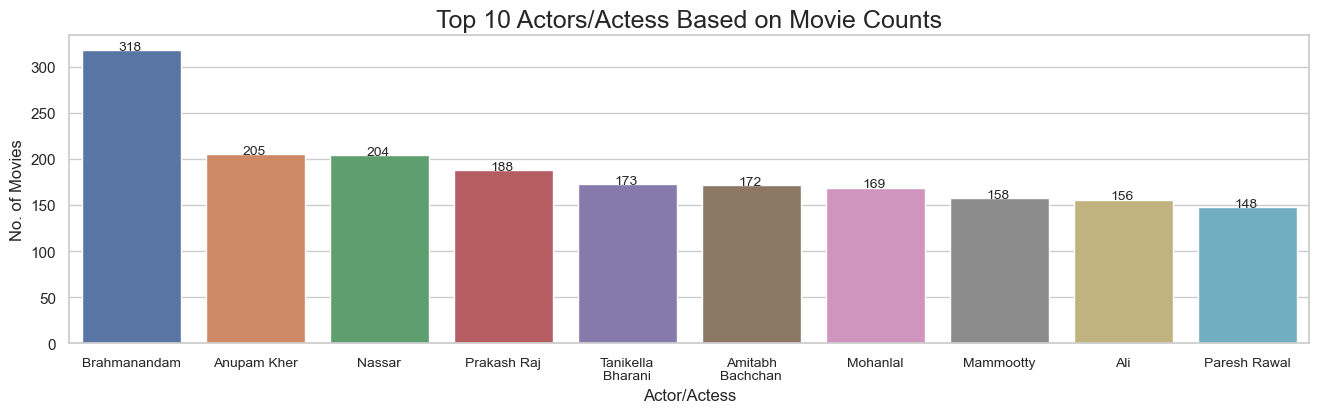

In [26]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

actor = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = count_movies)
ax.set_title('Top 10 Actors/Actess Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Actor/Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')

plt.show()

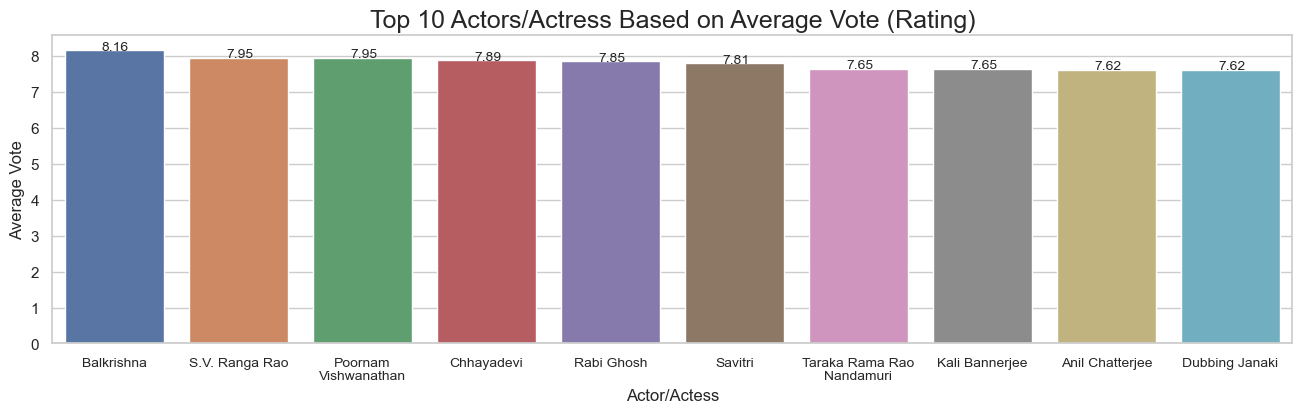

In [34]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have become an actor/actress on 10 movies
mask = movies_actor_split.groupby('actor_split')['imdb_title_id'].count() >= 10
actor = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = avg_vote)
ax.set_title('Top 10 Actors/Actress Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Actor/Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
plt.show()

In [35]:
data_recsys=imdb_movies[['original_title', 'genre', 'director', 'actors',
                         'description','writer',
                         'reviews_from_critics','reviews_from_users'
                         ]].reset_index(drop = True)
data_recsys.head()

,original_title,genre,director,actors,description,writer,reviews_from_critics,reviews_from_users
0,Prem Sanyas,Drama,"Franz Osten, Himanshu Rai","Seeta Devi, Himanshu Rai, Sarada Ukil, Ranibal...",This adaptation of Arnold's 1861 Orientalist e...,"Edwin Arnold, Niranjan Pal",1.0,3.0
1,Shiraz,"Drama, History, Romance",Franz Osten,"Himanshu Rai, Charu Roy, Seeta Devi, Enakashi ...",A historical romance set in the Mughal Empire....,"Niranjan Pal, William A. Burton",9.0,4.0
2,Prapancha Pash,"Adventure, Drama, Romance",Franz Osten,"Seeta Devi, Himanshu Rai, Charu Roy, Modhu Bos...",Two neighboring Indian kingdoms are ruled by c...,"Niranjan Pal, W.A. Burton",14.0,8.0
3,Alam Ara,"Drama, Fantasy",Ardeshir Irani,"Master Vithal, Zubeida, Jillo, Sushila, Prithv...",A period fantasy that told of the ageing king ...,"Joseph David, Joseph David",1.0,NaN
4,Achhut Kanya,"Drama, Musical, Romance",Franz Osten,"Devika Rani, Ashok Kumar, Monorama, Pramila, K...","An ""untouchable"" girl and a Brahmin boy fall i...","J.S. Casshyap, Niranjan Pal",1.0,2.0


In [36]:
data_recsys.set_index('original_title', inplace = True)

data_recsys['genre'] = data_recsys['genre'].fillna('').astype('str').str.lower()
data_recsys['genre'] = data_recsys['genre'].str.split(',')

data_recsys['director'] = data_recsys['director'].fillna('').astype('str').str.lower()
data_recsys['director'] = data_recsys['director'].str.split(',')

data_recsys['actors'] = data_recsys['actors'].fillna('').astype('str').str.lower()
data_recsys['actors'] = data_recsys['actors'].str.split(',')

data_recsys['writer'] = data_recsys['writer'].fillna('').astype('str').str.lower()
data_recsys['writer'] = data_recsys['writer'].str.split(',')

data_recsys['reviews_from_critics'] = data_recsys['reviews_from_critics'].fillna('').astype('str').str.lower()
data_recsys['reviews_from_critics'] = data_recsys['reviews_from_critics'].str.split(',')

data_recsys['reviews_from_users'] = data_recsys['reviews_from_users'].fillna('').astype('str').str.lower()
data_recsys['reviews_from_users'] = data_recsys['reviews_from_users'].str.split(',')

data_recsys['description'] = data_recsys['description'].fillna('').astype('str').str.lower()
data_recsys['description'] = data_recsys['description'].str.translate(str.maketrans('', '', string.punctuation))

In [37]:
listStopwords = set(stopwords.words('english'))
filtered = []
ps = PorterStemmer() 
for i, text in enumerate(data_recsys['description'].str.split()):
    for word in text:
        # Filtering/Removing stopwords in the text
        if word not in listStopwords:
            # Stemming words
            word_stemmed = ps.stem(word)
            filtered.append(word_stemmed)
    data_recsys['description'][i] = filtered
    filtered = []

In [38]:
data_recsys['final_content'] = ''
for i, text in data_recsys.iterrows():
    words = ''
    for col in data_recsys.columns:
        words = words + ' '.join(text[col]) + ' '
    data_recsys['final_content'][i] = words

In [39]:
data_recsys.to_csv("C:/Users/hp15s/Desktop/movierec/data/recommendation.csv")

In [40]:
count = CountVectorizer()
count_matrix = count.fit_transform(data_recsys['final_content']).astype(np.uint8)

In [41]:
chunk_size = 500 
matrix_len = count_matrix.shape[0] 

def similarity_cosine(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=count_matrix[start:end], Y=count_matrix)
cosine_similarity_all = []
i=0

In [42]:
for chunk_start in range(0, matrix_len, chunk_size):
    
    if i == 0: 
        cosine_sim = similarity_cosine(chunk_start, chunk_start+chunk_size)
    
    else :
        cosine_similarity_chunk= similarity_cosine(chunk_start, chunk_start+chunk_size)
        cosine_sim = np.concatenate((cosine_sim.astype(np.float32), cosine_similarity_chunk.astype(np.float32)))
    
    i= 1

In [43]:
index_movies = pd.Series(data_recsys.index)

# Movies Recommendation function
def get_movies(title, cosine_sim = cosine_sim):
    recommended_movies = []
    index_movie_input = index_movies[index_movies == title].index[0]
    score_movies = pd.Series(cosine_sim[index_movie_input]).sort_values(ascending = False)
    top_10_index_movies = list(score_movies.iloc[1:11].index)
    for i in top_10_index_movies:
        recommended_movies.append(imdb_movies['original_title'].iloc[i] + ' (' + str(imdb_movies['year'].iloc[i]) + ')')
    return recommended_movies

In [44]:
get_movies('Zindagi Na Milegi Dobara')

['Luck by Chance (2009)',
 'Don 2 (2011)',
 'Dil Dhadakne Do (2015)',
 'Bombay Talkies (2013)',
 'Lakshya (2004)',
 'Rock On!! (2008)',
 'Dil Chahta Hai (2001)',
 'Gully Boy (2019)',
 'Albert Pinto Ko Gussa Kyon Ata Hai (1980)',
 'Naseem (1995)']